In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

import math

In [46]:
image = cv2.imread("../../images/mask1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image.shape

(228, 350)

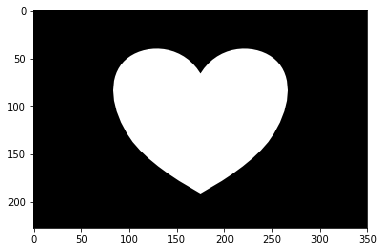

In [16]:
plt.imshow(image,cmap='gray')

### Hoistogram
cv2.calcHist(images,channels,mask,histSize,ranges)

channels: This is a list of indexes

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist.shape

(-10, 256)

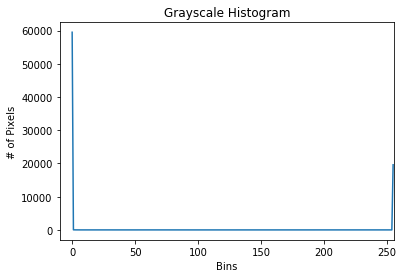

In [27]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([-10, 256])

In [52]:
image = cv2.imread("../../images/beach.png")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)

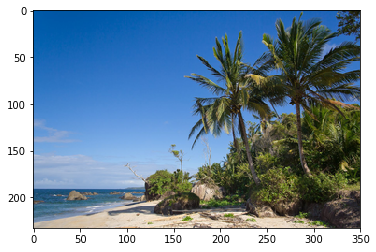

In [62]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGBA))

In [63]:
ch = cv2.split(image)
ch[0]

array([[170, 170, 170, ...,   9,  14,   9],
       [170, 170, 170, ...,  14,   7,   9],
       [170, 170, 169, ...,   8,  19,  53],
       ..., 
       [171, 172, 172, ...,  41,  38,  36],
       [171, 170, 165, ...,  34,  45,  41],
       [164, 161, 159, ...,  50,  57,  58]], dtype=uint8)

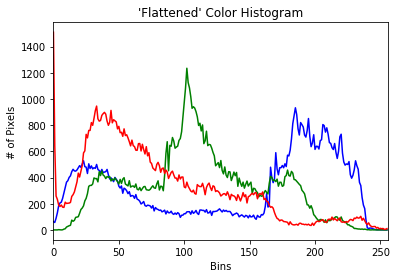

In [64]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    # Create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

<bound method Figure.tight_layout of <matplotlib.figure.Figure object at 0x11ccb9a20>>

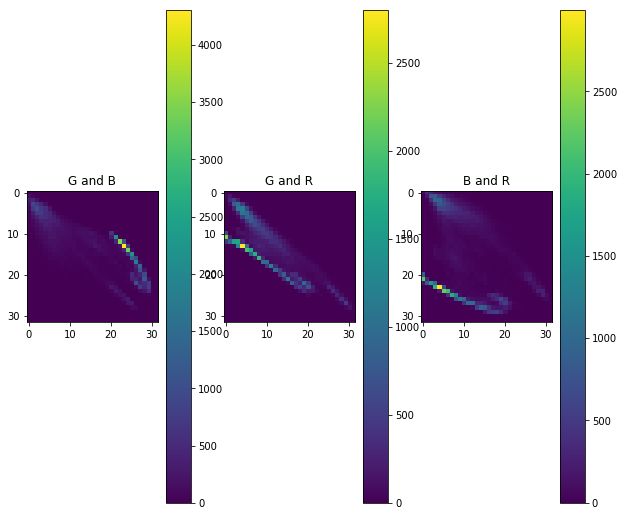

In [80]:
bins = 32

fig = plt.figure(figsize=(10,10))

# Plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,[bins, bins], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
    [bins, bins], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
    [bins, bins], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("B and R")
plt.colorbar(p)


fig.tight_layout

In [83]:
print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

2D histogram shape: (32, 32), with 1024 values


In [85]:
hist = cv2.calcHist([image], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

# Show our plots
plt.show()

3D histogram shape: (8, 8, 8), with 512 values
